In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import requests
from urllib.parse import urlencode

In [4]:
# Чтение данных из облака
def download_link(public_key):

    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    return download_url

In [5]:
df = pd.read_csv(download_link('https://disk.yandex.ru/d/31XYRde1spiTHw'),
        sep = ';', index_col=0)

In [6]:
df.head()

,uid,experimentVariant,version,purchase
1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


In [7]:
df.dtypes

uid                  object
experimentVariant     int64
version              object
purchase              int64
dtype: object

  0%|          | 0/1000 [00:00<?, ?it/s]

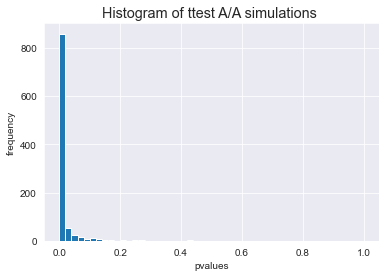

FPR = 0.925


In [8]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста

for i in tqdm(range(simulations)):
    s1 = df.query('experimentVariant == 1').purchase.sample(n_s, replace = False).values
    s0 = df.query('experimentVariant == 0').purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s0, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
FPR = sum(np.array(res) < 0.05) / simulations
print(f'FPR = {FPR}')

In [9]:
df.version.unique()

array(['v2.8.0', 'v2.9.0', 'v3.7.4.0', 'v3.8.0.0'], dtype=object)

In [10]:
df.groupby('version', as_index=False)\
    .mean()

,version,experimentVariant,purchase
0,v2.8.0,0.501624,0.023372
1,v2.9.0,0.502338,0.072973
2,v3.7.4.0,0.501009,0.061484
3,v3.8.0.0,0.517621,0.060319


Конверсия версии V2.8.0 сильно отличается от конверсий остальных приложений. Вероятно, проблема в этом

  0%|          | 0/1000 [00:00<?, ?it/s]

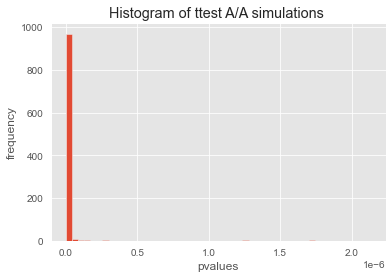

FPR = 1.0
6.2623698797723645e-12


In [11]:
res = []

for i in tqdm(range(simulations)):
    s1 = df.query("experimentVariant == 1 & version == 'v2.8.0'").purchase.sample(n_s, replace = False).values
    s0 = df.query("experimentVariant == 0 & version == 'v2.8.0'").purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s0, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
FPR = sum(np.array(res) < 0.05) / simulations
print(f'FPR = {FPR}')
print(res[0])

  0%|          | 0/1000 [00:00<?, ?it/s]

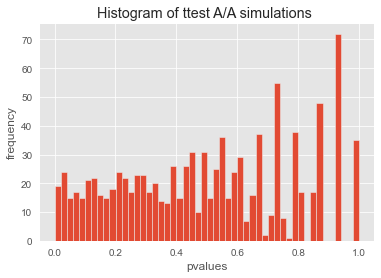

FPR = 0.048
0.39027647382424435


In [12]:
res = []

for i in tqdm(range(simulations)):
    s1 = df.query("experimentVariant == 1 & version == 'v2.9.0'").purchase.sample(n_s, replace = False).values
    s0 = df.query("experimentVariant == 0 & version == 'v2.9.0'").purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s0, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
FPR = sum(np.array(res) < 0.05) / simulations
print(f'FPR = {FPR}')
print(res[0])

  0%|          | 0/1000 [00:00<?, ?it/s]

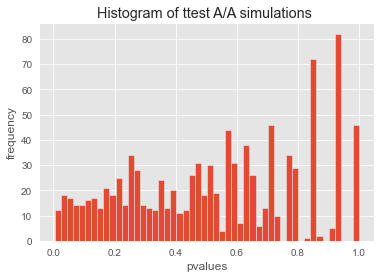

FPR = 0.036
0.3540567310273762


In [13]:
res = []

for i in tqdm(range(simulations)):
    s1 = df.query("experimentVariant == 1 & version == 'v3.7.4.0'").purchase.sample(n_s, replace = False).values
    s0 = df.query("experimentVariant == 0 & version == 'v3.7.4.0'").purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s0, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
FPR = sum(np.array(res) < 0.05) / simulations
print(f'FPR = {FPR}')
print(res[0])

  0%|          | 0/1000 [00:00<?, ?it/s]

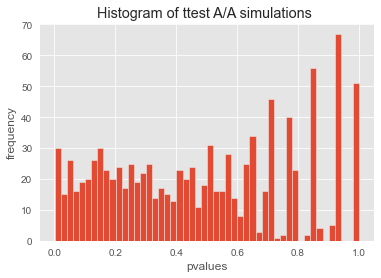

FPR = 0.036
0.5662083116569944


In [14]:
res = []

for i in tqdm(range(simulations)):
    s1 = df.query("experimentVariant == 1 & version == 'v3.8.0.0'").purchase.sample(n_s, replace = False).values
    s0 = df.query("experimentVariant == 0 & version == 'v3.8.0.0'").purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s0, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
FRP = sum(np.array(res) < 0.05) / simulations
print(f'FPR = {FPR}')
print(res[0])

В вычислении p-value выявлена аномалия в выборке версии v2.8.0

  0%|          | 0/1000 [00:00<?, ?it/s]

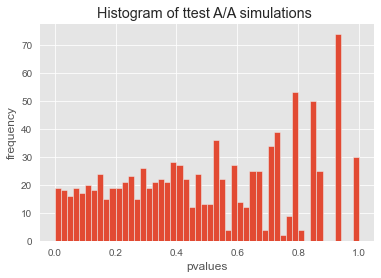

FPR = 0.036


In [15]:
res = []

for i in tqdm(range(simulations)):
    s1 = df.query("experimentVariant == 1 & version != 'v2.8.0'").purchase.sample(n_s, replace = False).values
    s0 = df.query("experimentVariant == 0 & version != 'v2.8.0'").purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s0, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
FPP = sum(np.array(res) < 0.05) / simulations
print(f'FPR = {FPR}')

Вывод: всё починилось, FPR менее выбранного уровня значимости.